In [2]:
# Import Matplotlib, pandas, and plotly
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px


## Prepare Data
In this assignment, you'll work with real estate data from Brazil. In the data directory for this project there are two CSV that you need to import and clean, one-by-one.

### Import
First, you are going to import and clean the data in data/brasil-real-estate-1.csv.

In [9]:
df1 = pd.read_csv(r'D:/mexico/brasil-real-estate-1.csv', encoding='latin1')
df2 = pd.read_csv(r'D:/mexico/brasil-real-estate-2.csv', encoding='latin1')

# removing unwanted column called  "unamed: 0"
df1 = df1.drop("Unnamed: 0", axis=1)
df2 = df2.drop("Unnamed: 0", axis=1)

In [10]:
df1.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,"$187,230.85"
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,"$81,133.37"
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,"$154,465.45"
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,"$146,013.20"
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,"$101,416.71"


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12834 entries, 0 to 12833
Data columns (total 6 columns):
property_type              12834 non-null object
place_with_parent_names    12834 non-null object
region                     12834 non-null object
lat-lon                    11551 non-null object
area_m2                    12834 non-null int64
price_usd                  12834 non-null object
dtypes: int64(1), object(5)
memory usage: 601.7+ KB


,area_m2
count,12834.000000
mean,116.687003
std,48.260754
min,53.000000
25%,78.000000
50%,105.000000
75%,145.000000
max,252.000000


In [12]:
#dropping all rows that have null values from df1

df1.dropna(inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11551 entries, 0 to 12833
Data columns (total 6 columns):
property_type              11551 non-null object
place_with_parent_names    11551 non-null object
region                     11551 non-null object
lat-lon                    11551 non-null object
area_m2                    11551 non-null int64
price_usd                  11551 non-null object
dtypes: int64(1), object(5)
memory usage: 631.7+ KB


In [13]:
# create two separate columns in df1: "lat" and "lon" from "lat-lon" column
df1[['lat','lon']] = df1['lat-lon'].str.split(',',expand=True).astype(float)
df1.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,"$187,230.85",-9.644305,-35.708814
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,"$81,133.37",-9.643093,-35.704840
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,"$154,465.45",-9.622703,-35.729795
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,"$146,013.20",-9.622837,-35.719556
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,"$101,416.71",-9.654955,-35.700227


In [14]:
# create "state" column from "place_with_parent_names" column for df1
df1['state'] = df1['place_with_parent_names'].str.split('|',expand=True)[2]
df1.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon,state
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,"$187,230.85",-9.644305,-35.708814,Alagoas
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,"$81,133.37",-9.643093,-35.704840,Alagoas
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,"$154,465.45",-9.622703,-35.729795,Alagoas
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,"$146,013.20",-9.622837,-35.719556,Alagoas
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,"$101,416.71",-9.654955,-35.700227,Alagoas


In [15]:
# change the "price_usd" column to by float and remove '$'
df1['price_usd'] = df1['price_usd'].str.replace('$','',regex=True).replace(',','',regex=True).astype(float)
df1.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon,state
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,187230.85,-9.644305,-35.708814,Alagoas
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,81133.37,-9.643093,-35.704840,Alagoas
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,154465.45,-9.622703,-35.729795,Alagoas
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,146013.20,-9.622837,-35.719556,Alagoas
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,101416.71,-9.654955,-35.700227,Alagoas


In [16]:
# Drop the "lat-lon" and "place_with_parent_names" columns
df1.drop(columns=['lat-lon','place_with_parent_names'],inplace=True)
df1.head()

,property_type,region,area_m2,price_usd,lat,lon,state
0,apartment,Northeast,110,187230.85,-9.644305,-35.708814,Alagoas
1,apartment,Northeast,65,81133.37,-9.643093,-35.704840,Alagoas
2,house,Northeast,211,154465.45,-9.622703,-35.729795,Alagoas
3,apartment,Northeast,99,146013.20,-9.622837,-35.719556,Alagoas
4,apartment,Northeast,55,101416.71,-9.654955,-35.700227,Alagoas


2. Cleaning DataFrame 2

In [17]:
df2.head()


,property_type,state,region,lat,lon,area_m2,price_brl
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36


In [18]:
#inspecting the data
df2.info()

#drop all NaN rows
df2.dropna(inplace= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833 entries, 0 to 12832
Data columns (total 7 columns):
property_type    12833 non-null object
state            12833 non-null object
region           12833 non-null object
lat              12833 non-null float64
lon              12833 non-null float64
area_m2          11293 non-null float64
price_brl        12833 non-null float64
dtypes: float64(4), object(3)
memory usage: 701.9+ KB


In [19]:
#create new column "price_used" from price_mxm(Brazilian reals) and drop price_mxn column
#data was collected in 2014, a dollar cost 19 pesos
df2['price_usd'] = df2['price_brl'] / 3.19
df2.drop(columns=['price_brl'],inplace=True)
df2.head()

,property_type,state,region,lat,lon,area_m2,price_usd
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,129850.463950
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,265958.786834
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,93867.799373
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,265958.786834
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,145495.097179


In [20]:
# Drop rows that have NaN values.
df2.dropna(inplace=True)

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11293 entries, 0 to 12832
Data columns (total 7 columns):
property_type    11293 non-null object
state            11293 non-null object
region           11293 non-null object
lat              11293 non-null float64
lon              11293 non-null float64
area_m2          11293 non-null float64
price_usd        11293 non-null float64
dtypes: float64(4), object(3)
memory usage: 705.8+ KB


In [22]:
#Now that i have cleaned Two dataframes,
#it's time to combine them into a single DataFrame to analyze.

df = pd.concat([df1,df2])
print('DF Shape: ',df.shape)
df.head()

DF Shape:  (22844, 7)


c:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


,area_m2,lat,lon,price_usd,property_type,region,state
0,110.0,-9.644305,-35.708814,187230.85,apartment,Northeast,Alagoas
1,65.0,-9.643093,-35.704840,81133.37,apartment,Northeast,Alagoas
2,211.0,-9.622703,-35.729795,154465.45,house,Northeast,Alagoas
3,99.0,-9.622837,-35.719556,146013.20,apartment,Northeast,Alagoas
4,55.0,-9.654955,-35.700227,101416.71,apartment,Northeast,Alagoas


#### It's time to start exploring your data. In this section, you'll use your new data visualization skills to learn more about the regional differences in the Brazilian real estate market.

In [23]:
fig = px.scatter_mapbox(
    df,
    lat='lat',
    lon='lon',
    center={"lat": -14.2, "lon": -51.9},  # Map will be centered on Brazil
    width=600,
    height=600,
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

NameError: name 'px' is not defined

In [24]:
# create a DataFrame summary_stats with the summary statistics for the "area_m2" and "price_usd" columns
summary_stats = df[['area_m2','price_usd']].describe()
summary_stats

,area_m2,price_usd
count,22844.000000,22844.000000
mean,115.020224,194987.315480
std,47.742932,103617.682978
min,53.000000,74892.340000
25%,76.000000,113898.770000
50%,103.000000,165697.555000
75%,142.000000,246900.880878
max,252.000000,525659.717868


Text(0.5,1,'Distribution of Home Prices')

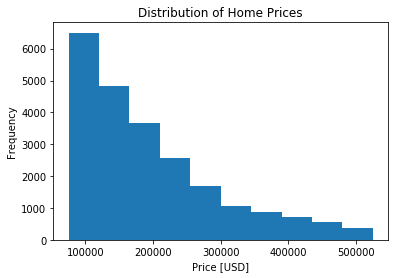

In [26]:
# histogram of "price_usd"

# Build histogram
plt.hist(df['price_usd'])

# Label axes
plt.xlabel('Price [USD]')
plt.ylabel('Frequency')

# Add title
plt.title('Distribution of Home Prices')

Text(0.5,1,'Distribution of Home Sizes')

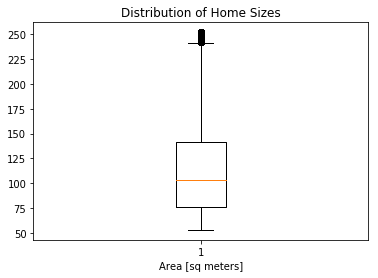

In [27]:
# horizontal boxplot of "area_m2"
# Build box plot
plt.boxplot(df["area_m2"])

# Label axes
plt.xlabel('Area [sq meters]')

# Add title
plt.title('Distribution of Home Sizes')

In [28]:
# a Series named mean_price_by_region that shows the mean home price in each region in Brazil, sorted from smallest to largest.
mean_price_by_region = df.groupby('region')['price_usd'].mean()
mean_price_by_region

region
Central-West    178596.283663
North           181308.958207
Northeast       185422.985441
South           189012.345265
Southeast       208996.762778
Name: price_usd, dtype: float64

AttributeError: Unknown property xlabel

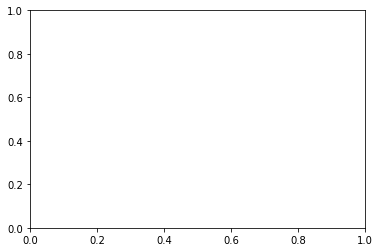

In [29]:
# create a bar chart
# Build bar chart, label axes, add title
mean_price_by_region.plot(kind='bar',
                          xlabel = 'Region',
                          ylabel = 'Mean Price [USD]',
                          title = 'Mean Home Price by Region'
                         )

In [30]:
# DataFrame df_south that contains all the homes from df that are in the "South" region.
df_south = df[df['region']=='South']
df_south.head()

,area_m2,lat,lon,price_usd,property_type,region,state
9304,127.0,-25.455704,-49.292918,296448.85,apartment,South,Paraná
9305,104.0,-25.455704,-49.292918,219996.25,apartment,South,Paraná
9306,100.0,-25.460236,-49.293812,194210.50,apartment,South,Paraná
9307,77.0,-25.460236,-49.293812,149252.94,apartment,South,Paraná
9308,73.0,-25.460236,-49.293812,144167.75,apartment,South,Paraná


In [31]:
# Use the value_counts method to create a Series homes_by_state that contains the number of properties in each state in df_south
homes_by_state = df_south['state'].value_counts()
homes_by_state

Rio Grande do Sul    2643
Santa Catarina       2634
Paraná               2544
Name: state, dtype: int64

Text(0.5,1,'Rio Grande do Sul: Price vs. Area')

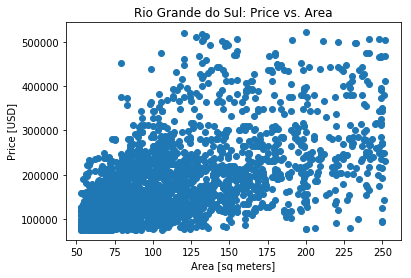

In [32]:
# scatter plot showing price vs. area for the state in df_south that has the largest number of properties.
top_state = homes_by_state.idxmax()  # State with the largest number of properties

# Filter the dataframe for the top state
df_top_state = df_south[df_south['state'] == top_state]

plt.scatter(df_top_state['area_m2'], df_top_state['price_usd'])

# Set labels and title
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title(f"{top_state}: Price vs. Area")

In [33]:
# Create a dictionary south_states_corr,
# where the keys are the names of the three states in the "South" region of Brazil,
# and their associated values are the correlation coefficient between "area_m2" and "price_usd" in that state
south_states = ['Paraná', 'Santa Catarina', 'Rio Grande do Sul']

# Initialize an empty dictionary to store the correlations
south_states_corr = {}

# Loop over each state and calculate the correlation between area_m2 and price_usd
for state in south_states:
    df_state = df_south[df_south['state'] == state]
    correlation = df_state['area_m2'].corr(df_state['price_usd'])
    south_states_corr[state] = correlation

south_states_corr

{'Paraná': 0.5436659935502659,
 'Santa Catarina': 0.5068121776366781,
 'Rio Grande do Sul': 0.5773267433717684}